<a href="https://colab.research.google.com/github/NicholasDow/Folder-of-Fail/blob/main/DiscordChat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 613Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 68.6Mit/s]                                                   
Fetching hparams.json: 1.05Mit [00:00, 780Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:03, 139Mit/s]                                   
Fetching model.ckpt.index: 1.05Mit [00:00, 485Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 198Mit/s]                                                 
Fetching vocab.bpe: 1.05Mit [00:00, 223Mit/s]                                                       


In [ ]:
chats = ['Swag Shack Revival - Text Channels - camp-mohawk-indentured-servants [732649027866329160].csv',
         'Swag Shack Revival - Text Channels - general [659561882792886333].csv']

In [ ]:
folder = '/content/drive/MyDrive/Discord Chats/'

In [ ]:
import pandas as pd

In [ ]:
df = pd.concat([pd.read_csv(folder+chat) for chat in chats])

In [ ]:
df

,AuthorID,Author,Date,Content,Attachments,Reactions
0,155138233573834752,jehlp#8886,14-Jul-20 01:25 PM,first,NaN,NaN
1,192302872099160064,GoldSpice#6624,14-Jul-20 01:26 PM,absolutely love the name,NaN,NaN
2,224710116019011584,fstock96#6623,14-Jul-20 01:26 PM,Ok but did u actually go to camp Mohawk,NaN,NaN
3,192302872099160064,GoldSpice#6624,14-Jul-20 01:26 PM,so fitting,NaN,NaN
4,192302872099160064,GoldSpice#6624,14-Jul-20 01:26 PM,FACTS,NaN,NaN
...,...,...,...,...,...,...
13902,224648066337210368,TheNumberDevil#9487,07-Dec-20 06:08 PM,"Lol is leffen the ""power greater than their own""",NaN,NaN
13903,224710116019011584,fstock96#6623,07-Dec-20 06:09 PM,yeah,NaN,NaN
13904,224648066337210368,TheNumberDevil#9487,07-Dec-20 06:09 PM,That's not exactly accurate lol,NaN,NaN
13905,192302872099160064,GoldSpice#6624,09-Dec-20 02:10 AM,Mooooooooooooo,NaN,NaN


In [ ]:
keep = list(df['Author'].value_counts().index)[:11]

In [ ]:
df = df[df.Author.isin(keep)]

In [ ]:
import nltk

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'])

In [ ]:
df

,AuthorID,Author,Date,Content,Attachments,Reactions,DateTime
0,155138233573834752,jehlp#8886,14-Jul-20 01:25 PM,first,NaN,NaN,2020-07-14 13:25:00
1,192302872099160064,GoldSpice#6624,14-Jul-20 01:26 PM,absolutely love the name,NaN,NaN,2020-07-14 13:26:00
2,224710116019011584,fstock96#6623,14-Jul-20 01:26 PM,Ok but did u actually go to camp Mohawk,NaN,NaN,2020-07-14 13:26:00
3,192302872099160064,GoldSpice#6624,14-Jul-20 01:26 PM,so fitting,NaN,NaN,2020-07-14 13:26:00
4,192302872099160064,GoldSpice#6624,14-Jul-20 01:26 PM,FACTS,NaN,NaN,2020-07-14 13:26:00
...,...,...,...,...,...,...,...
13902,224648066337210368,TheNumberDevil#9487,07-Dec-20 06:08 PM,"Lol is leffen the ""power greater than their own""",NaN,NaN,2020-12-07 18:08:00
13903,224710116019011584,fstock96#6623,07-Dec-20 06:09 PM,yeah,NaN,NaN,2020-12-07 18:09:00
13904,224648066337210368,TheNumberDevil#9487,07-Dec-20 06:09 PM,That's not exactly accurate lol,NaN,NaN,2020-12-07 18:09:00
13905,192302872099160064,GoldSpice#6624,09-Dec-20 02:10 AM,Mooooooooooooo,NaN,NaN,2020-12-09 02:10:00


In [ ]:
df['Hour'] = df['DateTime'].dt.hour
df['Date'] = df['DateTime'].dt.date
df['Month'] = df['DateTime'].dt.month

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['DateTime']))

In [ ]:
df['MonthYear'] = df['DateTime'].dt.to_period('M')
df['MonthYear'] = df['MonthYear'].apply(lambda x: x.strftime("%Y %B"))
df
bigMonthYear = df[df['Author'].isin(keep[:5])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
MonthYearData = bigMonthYear.pivot_table(index = 'Author',
               columns = 'MonthYear',
               fill_value = 0,
               aggfunc='size').unstack().to_frame().rename(columns={0:'Number'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

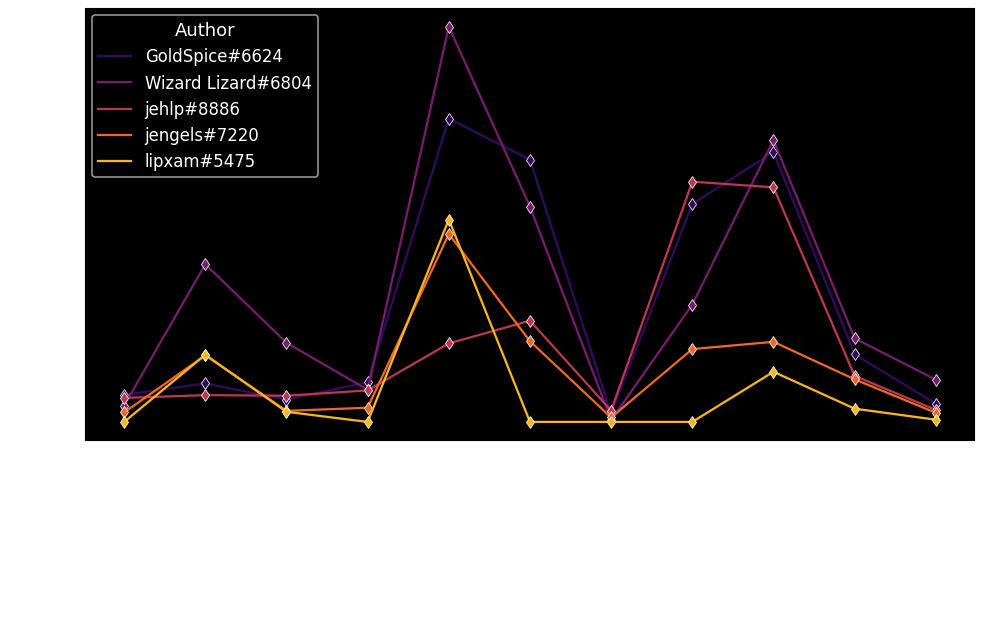

In [ ]:
%matplotlib inline
sns.set_context("talk")
plt.figure(figsize=(16, 8))
sns.lineplot(x='MonthYear', y='Number', hue='Author', 
             data=MonthYearData, marker='d', palette='inferno')
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['Month']

In [ ]:
MonthData = df.pivot_table(index = 'Author',
                           columns = '')

In [ ]:
HourData = df.pivot_table(index = 'Author',
               columns = 'Hour',
               fill_value = 0,
               aggfunc='size').unstack().to_frame().rename(columns={0:'Number'})

In [ ]:
!pip install mplcyberpunk

In [ ]:
plt.style.use("dark_background")

In [ ]:
HourData

Number
Hour Author                     
0    Corvus#5124               0
     GoldSpice#6624           26
     Nero#0060                24
     TheNumberDevil#9487      28
     Wizard Lizard#6804      182
...                          ...
23   jamieJNPC#2837            0
     jehlp#8886              118
     jengels#7220             37
     lipxam#5475              65
     제이의 트위터#1870             12

[264 rows x 1 columns]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_

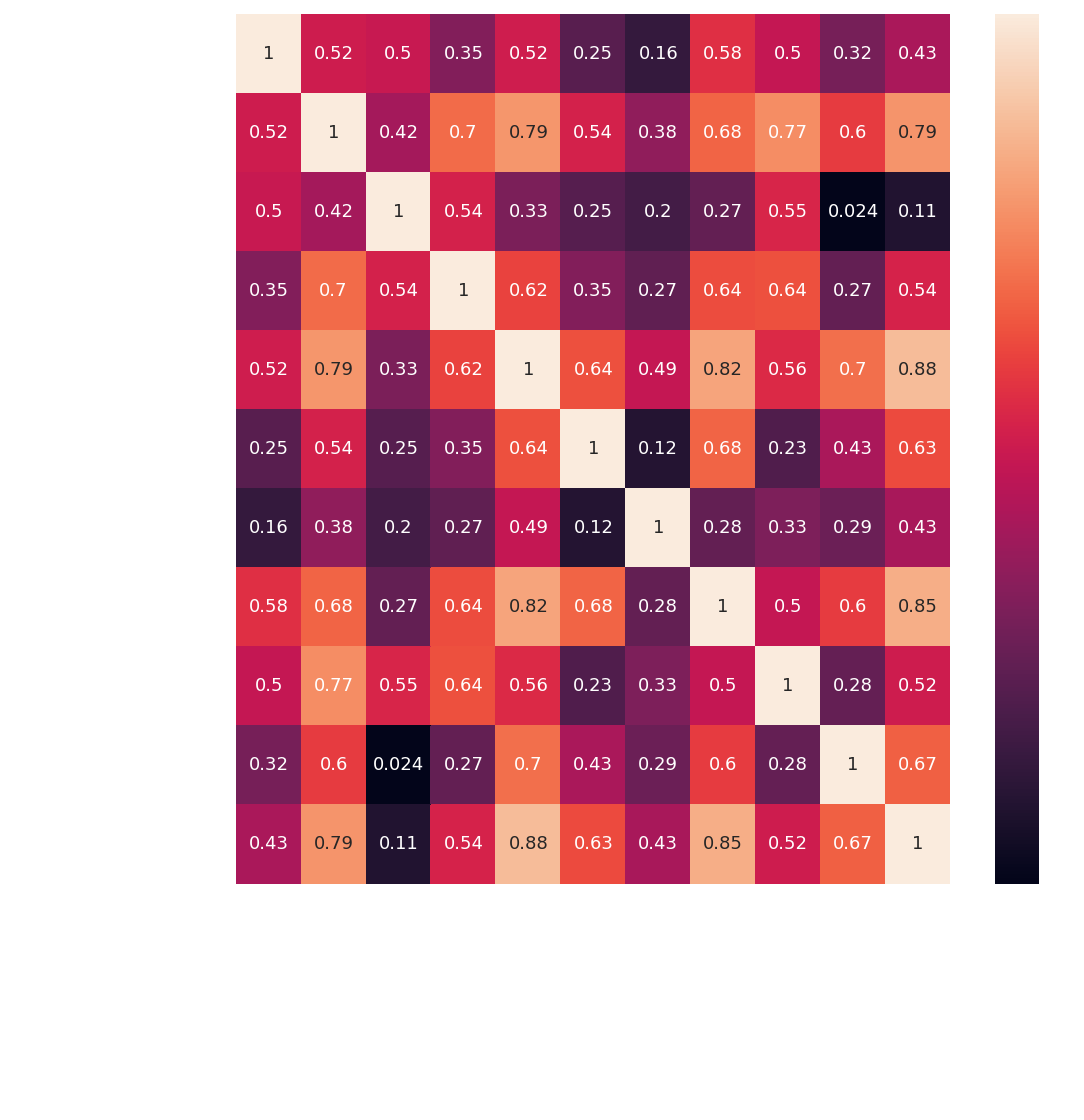

In [ ]:
corrMatrix = HourData.reset_index().pivot(index = 'Hour', columns ='Author', values='Number').corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_

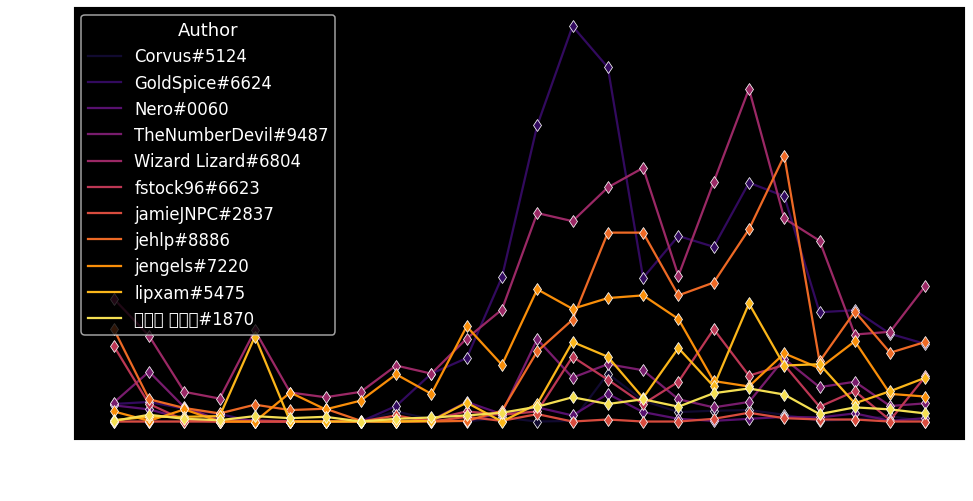

In [ ]:
%matplotlib inline
sns.set_context("talk")
plt.figure(figsize=(16, 8))
sns.lineplot(x='Hour', y='Number', hue='Author', 
             data=HourData, marker='d', palette='inferno')

In [ ]:
big = df[df.Author.isin(keep[:-7])]
small = df[df.Author.isin(keep[-7:])]
big = big.pivot_table(index = 'Author',
               columns = 'Hour',
               fill_value = 0,
               aggfunc='size').unstack().to_frame().rename(columns={0:'Number'})
small = small.pivot_table(index = 'Author',
               columns = 'Hour',
               fill_value = 0,
               aggfunc='size').unstack().to_frame().rename(columns={0:'Number'})

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_

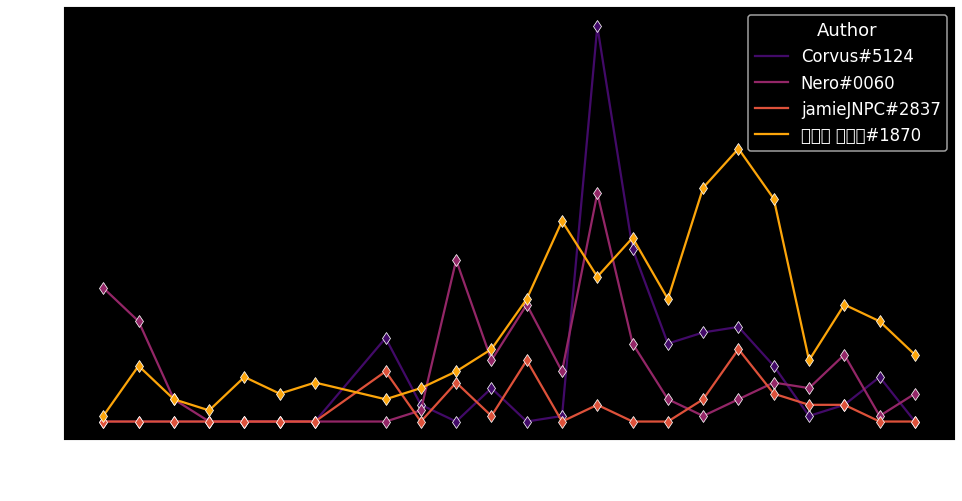

In [ ]:
%matplotlib inline
sns.set_context("talk")
plt.figure(figsize=(16, 8))
sns.lineplot(x='Hour', y='Number', hue='Author', 
             data=small, marker='d', palette='inferno')

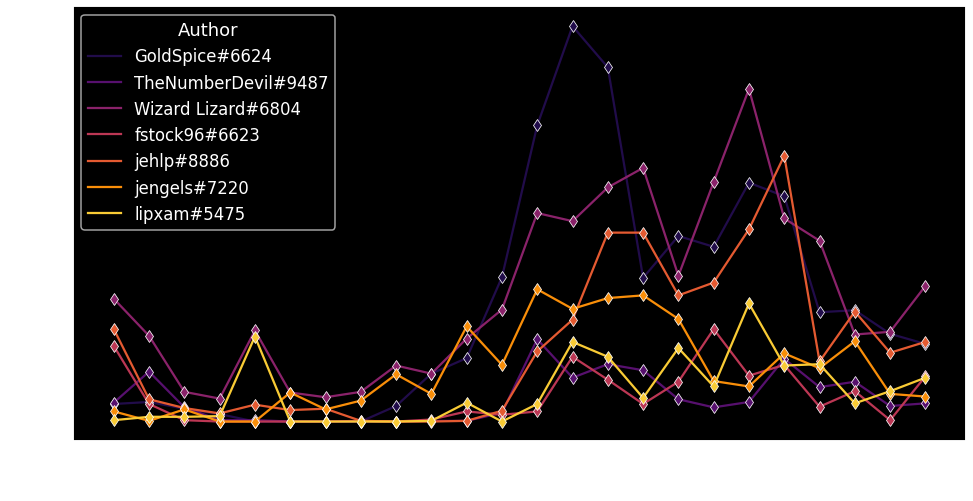

In [ ]:
%matplotlib inline
sns.set_context("talk")
plt.figure(figsize=(16, 8))
sns.lineplot(x='Hour', y='Number', hue='Author', 
             data=big, marker='d', palette='inferno')

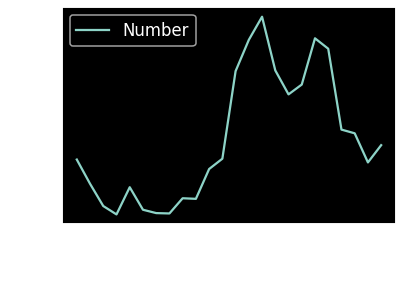

In [ ]:
df.groupby(['Hour']).size().to_frame().rename(columns={0:'Number'}).plot()

In [ ]:
test = df.pivot_table(index = 'Author',
               columns = 'Date',
               fill_value = 0,
               aggfunc='size').unstack().to_frame().rename(columns={0:'Number'})

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_

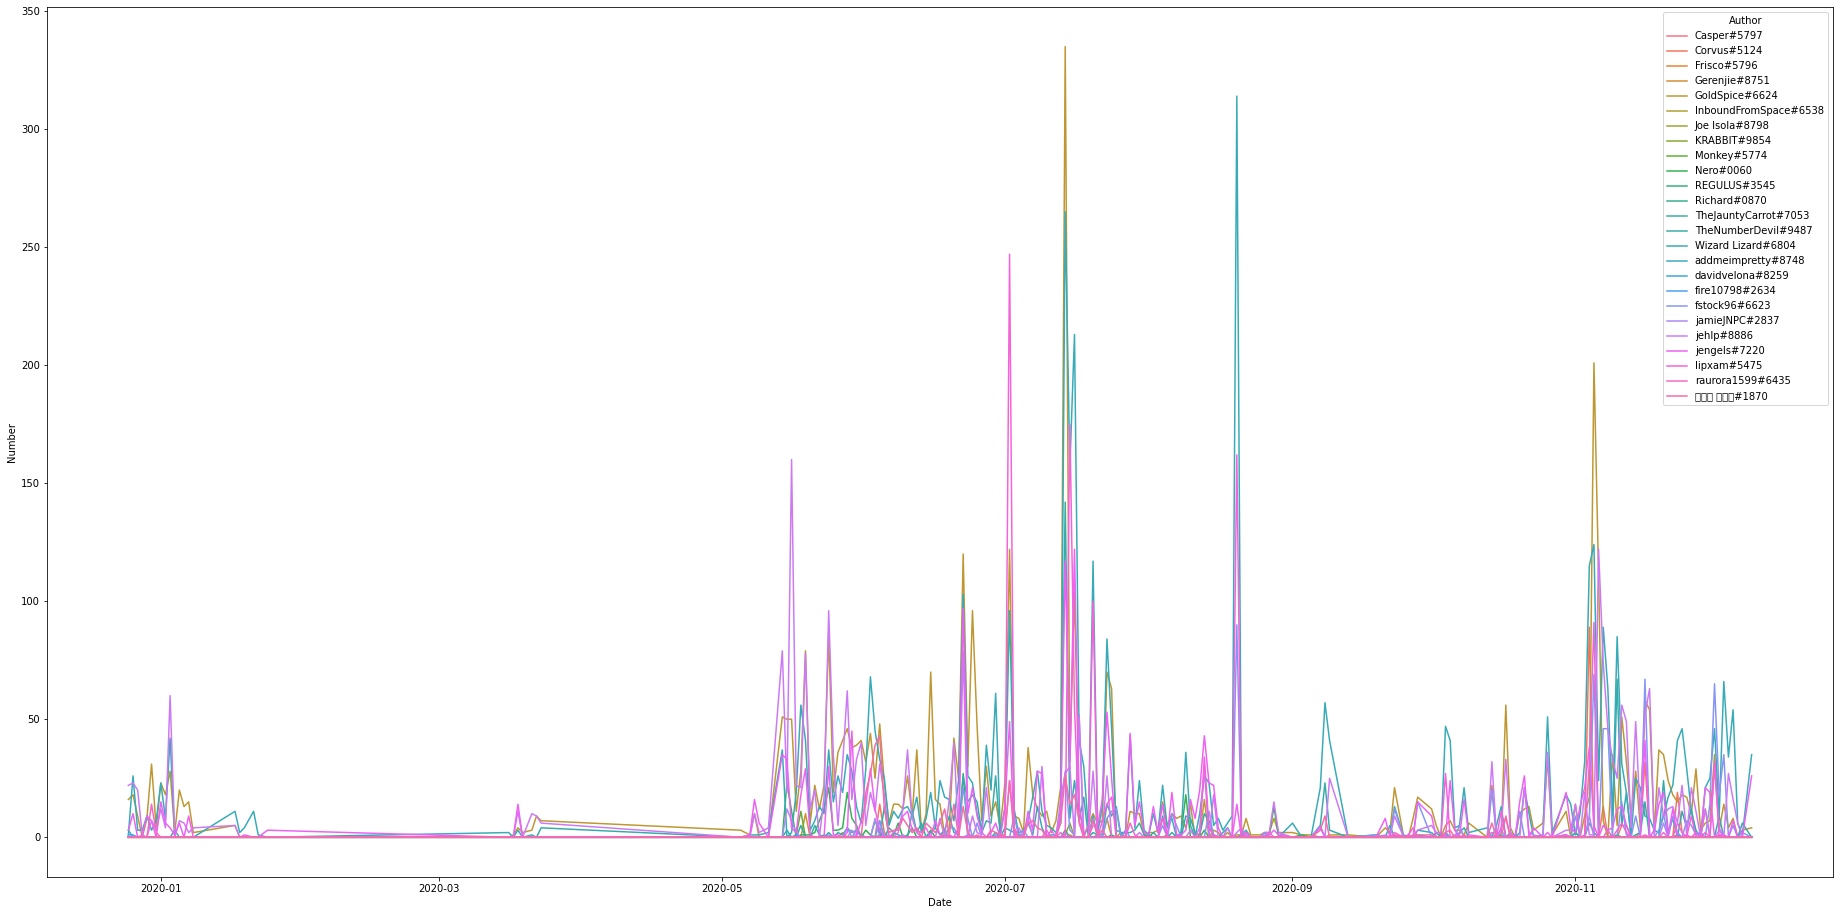

In [ ]:
%matplotlib inline
plt.figure(figsize=(32, 16))
sns.lineplot(x='Date', y='Number', hue='Author', 
             data=test)

In [ ]:
Nicholas = df[df['Author'].isin(keep[:1])]

In [ ]:
Nicholas

,AuthorID,Author,Date,Content,Attachments,Reactions
6,208385770887577600,Wizard Lizard#6804,14-Jul-20 01:26 PM,I love it,NaN,NaN
8,208385770887577600,Wizard Lizard#6804,14-Jul-20 01:26 PM,3,NaN,NaN
9,208385770887577600,Wizard Lizard#6804,14-Jul-20 01:26 PM,3,NaN,NaN
10,208385770887577600,Wizard Lizard#6804,14-Jul-20 01:26 PM,oh 3 doesn't work here,NaN,NaN
12,208385770887577600,Wizard Lizard#6804,14-Jul-20 01:26 PM,perfect,NaN,NaN
...,...,...,...,...,...,...
13885,208385770887577600,Wizard Lizard#6804,06-Dec-20 12:23 AM,i won part 1,NaN,NaN
13886,208385770887577600,Wizard Lizard#6804,06-Dec-20 12:23 AM,lost part 2,NaN,NaN
13887,208385770887577600,Wizard Lizard#6804,06-Dec-20 12:23 AM,because of a fuck up,NaN,NaN
13892,208385770887577600,Wizard Lizard#6804,06-Dec-20 01:52 AM,https://www.youtube.com/watch?v=t3rKrTehORY,NaN,NaN


In [ ]:
CleanNicholas = Nicholas[Nicholas['Content'].str.count('\s+').gt(3)]

In [ ]:
CleanNicholas = CleanNicholas.applymap(str)

In [ ]:
from urllib.parse import urlparse
def is_url(url):
  try:
    result = urlparse(url)
    return all([result.scheme, result.netloc])
  except ValueError:
    return False

CleanNicholas['Content'] = [' '.join(y for y in x.split() if not is_url(y)) for x in CleanNicholas['Content']]

In [ ]:
CleanNicholas = Nicholas[Nicholas['Content'].str.count('\s+').gt(5)]

In [ ]:
CleanNicholas

,AuthorID,Author,Date,Content,Attachments,Reactions
36,208385770887577600,Wizard Lizard#6804,14-Jul-20 01:51 PM,I am legit starting to dream in code,NaN,"🔥 (1),🧙🏿‍♀️ (1)"
40,208385770887577600,Wizard Lizard#6804,14-Jul-20 01:51 PM,but u can't get out of the loop,NaN,NaN
91,208385770887577600,Wizard Lizard#6804,14-Jul-20 03:11 PM,if it has a multi index its,NaN,NaN
101,208385770887577600,Wizard Lizard#6804,14-Jul-20 05:35 PM,but like is have promised my soul to a bunch o...,NaN,NaN
103,208385770887577600,Wizard Lizard#6804,15-Jul-20 03:31 AM,I don't know if this is clever or if I'm just ...,NaN,NaN
...,...,...,...,...,...,...
13829,208385770887577600,Wizard Lizard#6804,29-Nov-20 07:51 PM,when I don't need to give a fuck anymore,NaN,NaN
13831,208385770887577600,Wizard Lizard#6804,29-Nov-20 07:51 PM,I want to make a little script that randomly s...,NaN,NaN
13865,208385770887577600,Wizard Lizard#6804,02-Dec-20 03:37 AM,advent of code was like share on twitter or this,NaN,NaN
13866,208385770887577600,Wizard Lizard#6804,02-Dec-20 03:37 AM,I have thought a lot about a concept like this,NaN,NaN


In [ ]:
CleanNicholas['Content'].to_csv('CleanNicholas.csv', index = False)

In [ ]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset='CleanNicholas.csv',
              model_name='124M',
              steps=100,
              restore_from='fresh',
              run_name='Nicholas Discord',
              print_every=20,
              sample_every=100,
              save_every=100
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loading checkpoint models/124M/model.ckpt
INFO:tensorflow:Restoring parameters from models/124M/model.ckpt


100%|██████████| 1/1 [00:00<00:00, 309.82it/s]

Loading dataset...


dataset has 42080 tokens
Training...
[20 | 261.63] loss=1.53 avg=1.53
[40 | 518.63] loss=1.51 avg=1.52
[60 | 784.85] loss=1.11 avg=1.38
[80 | 1052.82] loss=0.79 avg=1.23
[100 | 1318.36] loss=0.34 avg=1.05
Saving checkpoint/Nicholas Discord/model-100


In [ ]:
gpt2.copy_checkpoint_to_gdrive(run_name='Nicholas Discord')

In [ ]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='Nicholas Discord')

In [ ]:
gpt2.generate(sess,
              length = 500,
              nsamples = 1000,
              batch_size = 20,
              run_name='Nicholas Discord',
              temperature = 1.0,
              include_prefix=False,
              destination_path='NicholasDow')